# Code session 6

## `interp1d`

A classe `interp1d` do submódulo `scipy.interpolate` pode ser usada como uma estrutura genérica para o cálculo de interpolação unidimensional do tipo $y_k = f(x_k)$.

Para usar `interp1d`, precisamos de, no mínimo, uma tabela de dados fornecida por dois parâmetros:

1. `x`: array de valores independentes 
2. `y`: array de valores dependentes 

Um dos argumentos opcionais relevantes de `interp1d` é:

- `kind`: tipo de dado `str` ou `int` que especifica o tipo de interpolação.

O valor padrão de `kind` é `'linear'`, o qual equivale à configuração de uma interpolação linear. Outras opções relevantes, bem como o que elas realizam estão dispostas na tabela a seguir: 

|opção|interpolação|
|:---:|:---:|
|`'nearest'`| vizinho mais próximo |
|`'zero'`| interpolação por spline de ordem 0|
|`'slinear'`| interpolação por spline de ordem 1|
|`'quadratic'`| interpolação por spline de ordem 2|
|`'cubic'`| interpolação por spline de ordem 3|

Se um valor inteiro for passado para `'kind'`, ele indicará a ordem da spline interpolatória. Por exemplo, `'kind' = 4` indica uma interpolação por spline de ordem 4.

Em Python, a classe `interp1d` é chamada da seguinte forma:

```python
from scipy.interpolate import interp1d
```

Podemos, agora, resolver alguns problemas de interpolação unidimensional por meio desta classe.

Em primeiro lugar, vamos importar alguns módulos necessários para nossos cálculos.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d

### Problema 1

Valores de entalpia por unidade de massa, $h$, de um plasma de Argônio em equilíbrio _versus_ temperatura estão tabelados no arquivo `file-cs6-entalpia.csv`. Usando esses dados:


- Escreva um programa para interpolar valores de $h$ para temperaturas no intervalo $5000 - 30000 \, ^{\circ}K$, com incrementos de $500 \, ^{\circ}K$. 

- Plote o gráfico de dispersão marcando com asteriscos os valores de entalpia tabelados. Em seguida, plote gráficos de linha para as seguintes interpolações: `'nearest'`, `'zero'`, `'slinear'` e `'quadratic'`. 

- Compare os valores interpolados de $h$ para cada um dos métodos de interpolação 
`'zero'`, `'slinear'` e `'quadratic'` do item anterior para $T= 15150 \, ^{\circ}K$. 

**Observação:** note que a temperatura da tabela deve ser multiplicada por 1000.

#### Resolução

Em primeiro lugar, vamos ler a tabela de dados, atribuir os valores tabelados em arrays e corrigir os valores de temperatura pelo fator 1000.

In [3]:
# atribuindo colunas da matriz de dados em h e T
h, T = np.loadtxt('file-cs6-entalpia.csv', delimiter=',', skiprows=1, unpack=True)

# temperatura em milhares de Kelvin
T = 1e3*T 

Criamos um array para o intervalo de temperaturas desejado para interpolação usando `arange`. Notemos que esta função exige um deslocamento do valor do incremento no último elemento do array, isto é, 30000 + 500 = 30500.

In [11]:
# array de temperaturas com incremento de 500 K
t = np.arange(5000.0,30500.0,500)

Em seguida, usamos os valores tabelados para posterior aplicação de `interp1d` sobre `t` como uma função e imprimimos os valores interpolados de entalpia:

In [16]:
# montagem da interpolação
f = interp1d(T,h)

# valores interpolados
hi = f(t) 

hi 

array([  3.3 ,   4.14,   4.98,   5.82,   6.66,   7.5 ,  14.36,  21.22,
        28.08,  34.94,  41.8 ,  43.8 ,  45.8 ,  47.8 ,  49.8 ,  51.8 ,
        53.64,  55.48,  57.32,  59.16,  61.  ,  69.02,  77.04,  85.06,
        93.08, 101.1 , 107.46, 113.82, 120.18, 126.54, 132.9 , 135.42,
       137.94, 140.46, 142.98, 145.5 , 150.68, 155.86, 161.04, 166.22,
       171.4 , 182.28, 193.16, 204.04, 214.92, 225.8 , 232.82, 239.84,
       246.86, 253.88, 260.9 ])

Vamos determinar os valores interpolados para cada método de interpolação e plotá-los juntamente com o gráfico de dispersão dos valores tabelados.

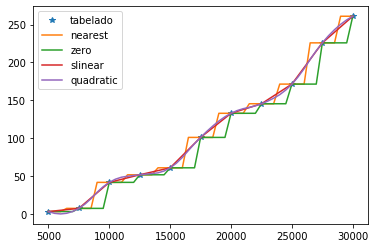

In [26]:
# métodos de interpolação
m = ['nearest', 'zero', 'slinear', 'quadratic']

# objetos de interpolação para cada método 
F = [interp1d(T,h,kind=k) for k in m]

# valores interpolados
him = [f(t) for f in F]

# plotagem dos valores tabelados
plt.plot(T,h,'*',label='tabelado');

# plotagem dos métodos
for i in range(4):
    plt.plot(t,him[i],label=m[i])

# legenda
plt.legend();    

Até aqui, já cumprimos os dois primeiros requisitos do problema. Para o terceiro, usaremos as informações pré-computadas na lista `F` para estimar os valores de entalpia quando $T = 15150 \, ^{\circ} K$. Teremos os seguintes três valores:

In [27]:
# calcula h(15150) para os métodos 'zero', 'slinear' e 'quadratic'
h_15150 = [f(15150) for f in F[1:]]

h_15150

[array(61.), array(63.406), array(62.60353522)]

Isto é, os valores de entalpia em $T = 15150 \, ^{\circ} K$ podem ser organizdos na tabela a seguir:

|método|valor|
|:---:|:---:|
|`'zero'`| 61.0 MJ/kg |
|`'slinear'`| 63.406 MJ/kg |
|`'quadratic'`| 62.604 MJ/kg |

Levando em conta que quanto mais alta é a ordem de interpolação, melhor é a interpolação, podemos inferir que desses três valores, $62.604 \, MJ/kg$ é o mais confiável para usar.

### Problema 2

O arquivo `file-cs6-salinidade.csv` tabela valores de salinidade da água (em ppt) em função da profundidade oceânica (em metros). Use interpolação por spline cúbica para gerar uma tabela de salinidades para profundidades de 0 a 3000 m com espaçamento de 10 m e estime os valores nas profundidades de 250 m, 750 m e 1800 m.

### Problema 3

A tabela a seguir apresenta a potência de um motor a Diesel (em hp) em diferentes rotações (em rpm). Gere uma tabela de valores interpolados com espaçamento de 10 rpm e destaque as potências em 2300 rpm e 3650 rpm.


|velocidade (rpm) | potência (hp) |
|:---:|:---:|
|1200|65|
|1500|130|
|2000|185|
|2500|225|
|3000|255|
|3250|266|
|3500|275|
|3750|272|
|4000|260|
|4400|230|